<a href="https://colab.research.google.com/github/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/blob/main/Preliminary_Investigation_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we carry out a preliminary investigation on our dataset. On the preliminary investigation, we perform the following analyses:

1. Descriptive analysis
2. Correlation analysis
3. Trend analysis
4. Stationarity test
5. Cointegration test


The trend analysis is to showcase the relationship between all independent variables with dependent variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import numpy as np


First of all, we import our datasets for our study. Below, we import our crude oil price index (WTI) from FRED.

In [2]:
# Install necessary libraries
!pip install fredapi pandas_datareader

import pandas as pd
from pandas_datareader import data as pdr
import datetime

from fredapi import Fred
key='3c9d0afae3809ea8bbe381f4a8112515'
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=key)

# Define date range
start_date = '1990-01-01'
end_date = '2024-12-31'

# Download Crude Oil WTI monthly price from FRED
# FRED Series ID for WTI crude oil: "DCOILWTICO"
wti_monthly = pdr.DataReader('DCOILWTICO', 'fred', start_date, end_date)

# Resample to monthly average (because oil prices might be daily)
wti_monthly = wti_monthly.resample('M').mean()

#Check the data
print("\nWTI Crude Oil monthly data:")
print(wti_monthly.head())


WTI Crude Oil monthly data:
            DCOILWTICO
DATE                  
1990-01-31   22.863182
1990-02-28   22.113000
1990-03-31   20.387727
1990-04-30   18.425500
1990-05-31   18.199545


<ipython-input-2-5c146e82c84b>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  wti_monthly = wti_monthly.resample('M').mean()


In [ ]:
# Save to CSV
wti_monthly.to_csv('wti_monthly.csv')

Next, we import our Financial Markets data (S&P 500 Index) from Yahoo finance.

In [3]:
# Install yfinance
!pip install yfinance

In [4]:
import yfinance as yf
import pandas as pd
import time

# Define start and end dates
start_date = '1990-01-01'
end_date = '2024-12-31'
try:
        # Download daily S&P 500 data from Yahoo Finance
        sp500_daily  = yf.download('^GSPC', start=start_date, end=end_date)
        time.sleep(2)  # Pause de 2 secondes entre les requêtes
except Exception as e:
        print(f"Erreur lors de la récupération des données pour ^GSPC: {e}")


# Check the available columns
print(sp500_daily.columns)

# Use 'Adj Close' if it exists, otherwise use 'Close'
if 'Adj Close' in sp500_daily.columns:
    sp500_prices = sp500_daily['Adj Close']
else:
    sp500_prices = sp500_daily['Close']

# Resample to monthly frequency by taking the last available trading day of each month
sp500_monthly = sp500_prices.resample('M').last()

# Check the data
print(sp500_monthly.head())

# Save to CSV
sp500_monthly.to_csv('sp500_monthly.csv')
if len(sp500_monthly)==0 :

   !wget -O sp500_monthly.csv 'https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/sp500_monthly.csv'
   sp500_monthly = pd.read_csv('sp500_monthly.csv')
   # Check the data
   print(sp500_monthly.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^GSPC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


MultiIndex([('Adj Close', '^GSPC'),
            (    'Close', '^GSPC'),
            (     'High', '^GSPC'),
            (      'Low', '^GSPC'),
            (     'Open', '^GSPC'),
            (   'Volume', '^GSPC')],
           names=['Price', 'Ticker'])
Empty DataFrame
Columns: [^GSPC]
Index: []
--2025-05-10 16:30:10--  https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/sp500_monthly.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 

<ipython-input-4-f880e8d24075>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500_prices.resample('M').last()


302 Found
Location: https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/sp500_monthly.csv [following]
--2025-05-10 16:30:10--  https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/sp500_monthly.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11904 (12K) [text/plain]
Saving to: ‘sp500_monthly.csv’

sp500_monthly.csv   100%[===================>]  11.62K  --.-KB/s    in 0.001s  

2025-05-10 16:30:11 (19.7 MB/s) - ‘sp500_monthly.csv’ saved [11904/11904]

         Date       ^GSPC
0  1990-01-31  329.079987
1  199


Next, we import our merged dataset from local machine for analysis.

In [5]:
#from google.colab import files

# Upload file from local machine
#uploaded = files.upload()
!wget -O Merged_Data.xlsx 'https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/Merged Data.xlsx'


--2025-05-10 16:30:11--  https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/Merged%20Data.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/Merged%20Data.xlsx [following]
--2025-05-10 16:30:11--  https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/Merged%20Data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserc

In [6]:
import pandas as pd

# Read uploaded Excel file
df_combined = pd.read_excel('Merged_Data.xlsx', sheet_name='Merged Data')

# Show the first few rows to check
df_combined.head()


,Date,S&P 500(^GSPC),WTI,GPR,TPU,CPU,WUI
0,1990-01-31,329.079987,22.863182,81.544044,30.920652,57.681392,0.0
1,1990-02-28,331.890015,22.113000,77.407211,30.685625,135.388264,0.0
2,1990-03-31,339.940002,20.387727,67.591942,36.767010,112.254839,0.0
3,1990-04-30,330.799988,18.425500,81.643845,36.441399,114.704969,0.0
4,1990-05-31,361.230011,18.199545,86.407120,37.740570,93.407382,0.0


Now that we have imported and read our dataset, we go ahead to conduct the preliminary investigations starting from the summary statistics below.

In [19]:
# Summary statistics
df_combined.describe()

,Date,S&P 500(^GSPC),WTI,GPR,TPU,CPU,WUI
count,420,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2007-07-16 06:24:00,1699.361783,51.096725,102.115528,47.752831,110.680450,114.962675
min,1990-01-31 00:00:00,304.000000,11.347273,39.045624,11.299124,28.161927,0.000000
25%,1998-10-23 06:00:00,915.707504,22.174628,78.107361,28.258176,67.131555,61.307354
50%,2007-07-15 12:00:00,1282.769958,47.881364,90.591480,33.796984,92.248778,101.341959
75%,2016-04-07 12:00:00,2100.105103,74.217049,111.968145,49.267429,131.050647,166.169238
max,2024-12-31 00:00:00,6032.379883,133.880000,512.529724,373.312153,422.186810,431.571593
std,NaN,1258.219554,29.283683,50.306958,41.494335,64.243430,89.546358


**Interpretation of Summary Statistics**

we observe through summary statistics that , between **1990-01-01** and **2024-12-31**there are 420 months.And during that period, **S&P 500(^GSPC) Equity** was more volatile than other variables on which we investigate, follow in order by **WUI(World Uncertainty Index),CPU(Climate Policy Uncertainty),GPR(Geopolitical Risk), TPU(Trade Policy uncertainty), WTI(West Texas Intermediate Crude oil price)**.

Next, let us observe how our variables are distributed.

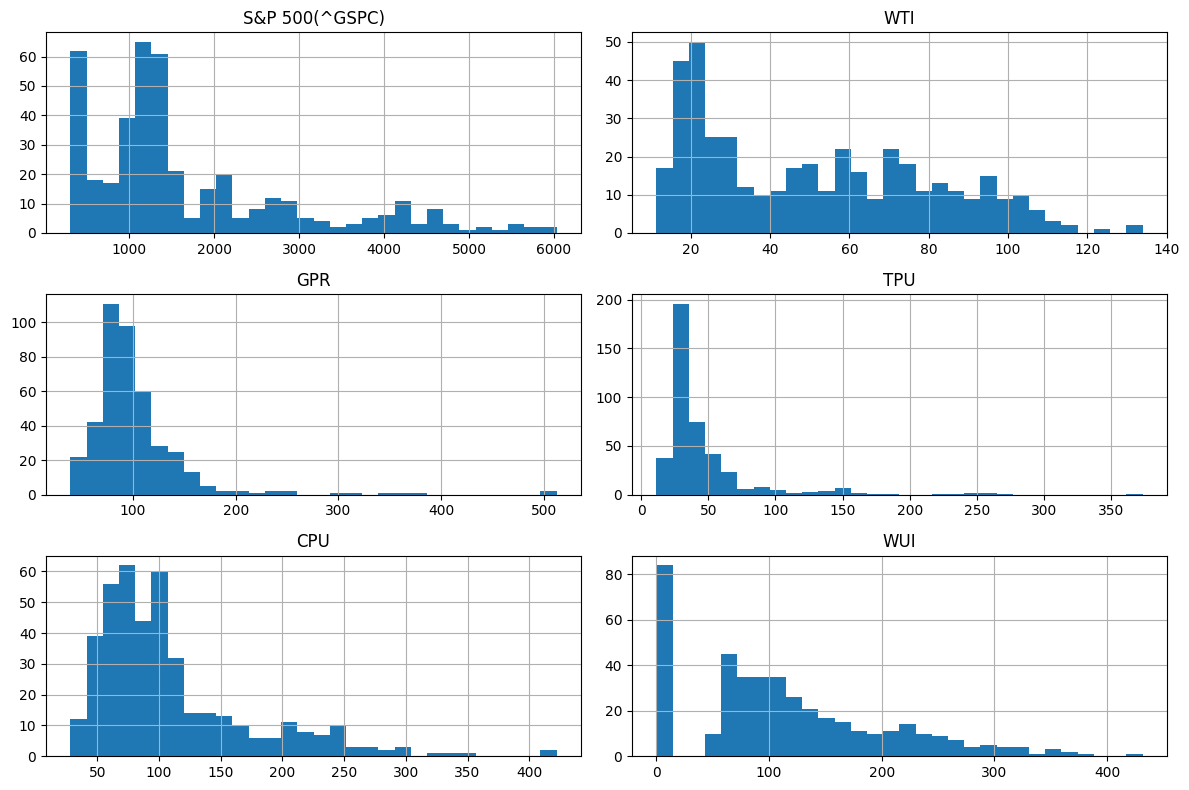

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for key variables
df_combined[['S&P 500(^GSPC)', 'WTI', 'GPR', 'TPU', 'CPU', 'WUI']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


The firstly observation shows that our variables are not normally distributed. Let us now go deeper.

In [37]:
from scipy.stats import kurtosis, skewnorm, skew

#help function

def Klabel(val):

    if val < 3:
        return "Platykurtic or Light Tail"
    elif val > 3:
        return "Leptokurtic or Heavy Tail"
    else:
         return "Normal"

def Slabel(val):

    if val < -0.5:
        return "Highly negatively skewed"
    elif val > 0.5:
        return "Highly positively skewed"
    elif -0.5 <= val <= 0.5:

        return "normal"

In [47]:
print('Variable  |  Kurtosis   | Kurtosis label   | Skewness   | Skewness label |')

for col in df_combined[['S&P 500(^GSPC)', 'WTI', 'GPR', 'TPU', 'CPU', 'WUI']].columns:
    print(f"{col}|  {round(kurtosis(df_combined[col]),2)}   | {Klabel(kurtosis(df_combined[col]))}   | {round(skew(df_combined[col]),2)}   | {Slabel(kurtosis(df_combined[col]))}|")


Variable  |  Kurtosis   | Kurtosis label   | Skewness   | Skewness label |
S&P 500(^GSPC)|  1.28   | Platykurtic or Light Tail   | 1.39   | Highly positively skewed|
WTI|  -0.91   | Platykurtic or Light Tail   | 0.47   | Highly negatively skewed|
GPR|  24.38   | Leptokurtic or Heavy Tail   | 4.08   | Highly positively skewed|
TPU|  17.13   | Leptokurtic or Heavy Tail   | 3.71   | Highly positively skewed|
CPU|  3.06   | Leptokurtic or Heavy Tail   | 1.66   | Highly positively skewed|
WUI|  0.14   | Platykurtic or Light Tail   | 0.71   | normal|


Checking the correlation between the variables to understand their relationships. This will help us understand the strength and direction of the relationships between our independent and dependent variables.

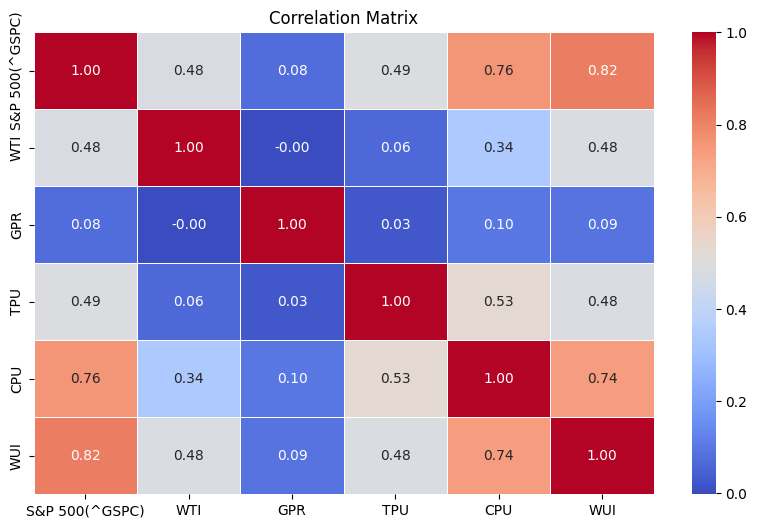

In [9]:
# Correlation matrix
corr_matrix = df_combined[['S&P 500(^GSPC)', 'WTI', 'GPR', 'TPU', 'CPU', 'WUI']].corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

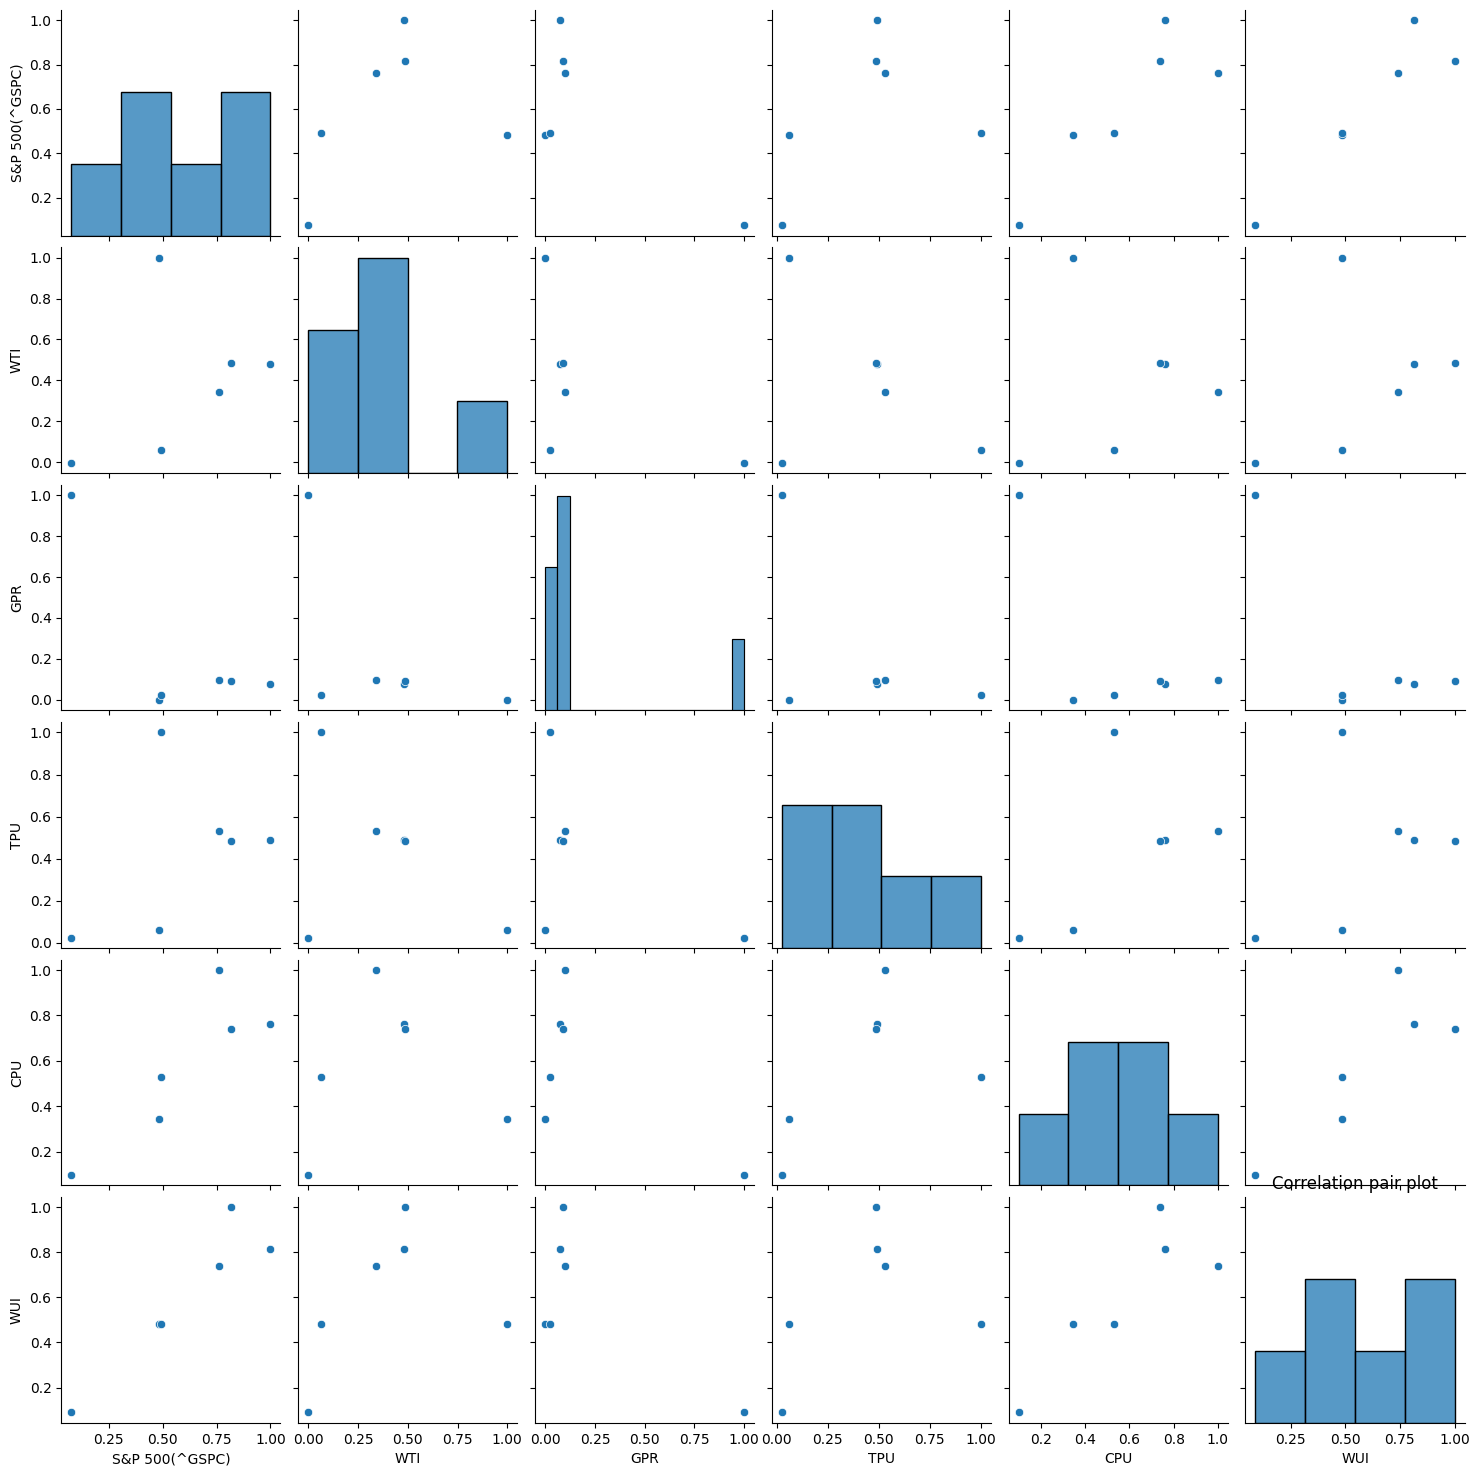

In [10]:
plt.figure(figsize=(10, 6))
sns.pairplot(corr_matrix)
plt.title("Correlation pair plot")
plt.show()

we obserse a high positive correlation between **S&P 500(^GSPC)** , **CPU** , and **WUI**, but an extremely weak positive correlation between **GPR** and **S&P 500(^GSPC)** and weak positive correlation with **TPU**. Also there are weak positive correlation between **WTI** and **WUI**,**CPU** but an extremely weak positive correlation with **TPU** and an extremely negative correlation with **GPR** .



For the trend analysis, we visualize how the variables evolve over time.

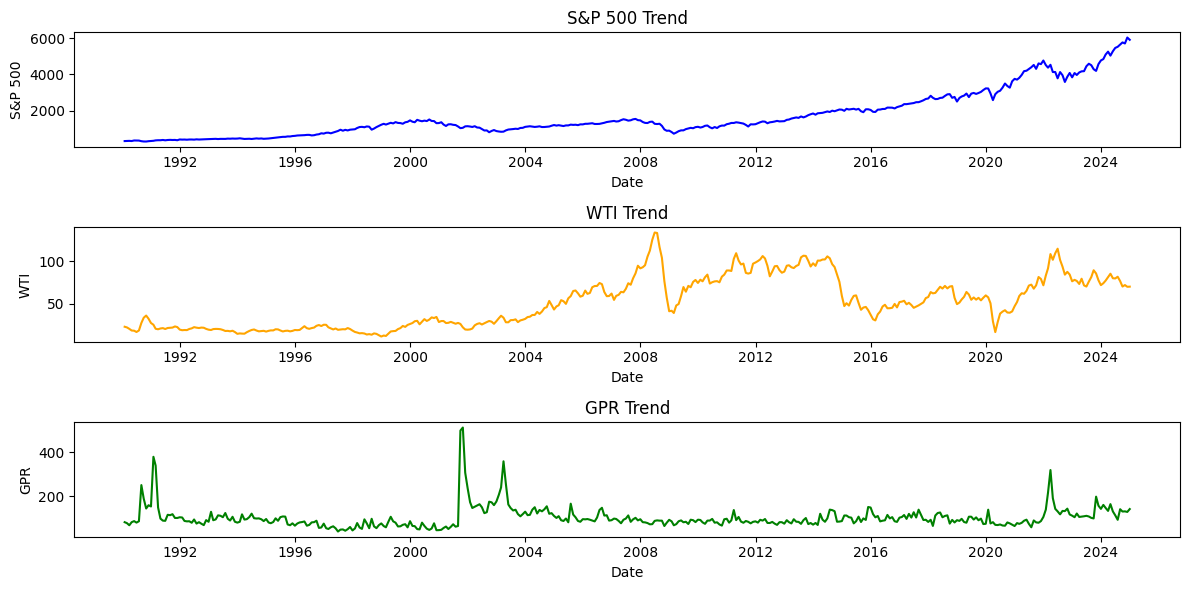

In [11]:
plt.figure(figsize=(12, 6))

# Plotting S&P 500, WTI, and GPR over time
plt.subplot(3, 1, 1)
plt.plot(df_combined['Date'], df_combined['S&P 500(^GSPC)'], label='S&P 500', color='blue')
plt.title('S&P 500 Trend')
plt.xlabel('Date')
plt.ylabel('S&P 500')

plt.subplot(3, 1, 2)
plt.plot(df_combined['Date'], df_combined['WTI'], label='WTI', color='orange')
plt.title('WTI Trend')
plt.xlabel('Date')
plt.ylabel('WTI')

plt.subplot(3, 1, 3)
plt.plot(df_combined['Date'], df_combined['GPR'], label='GPR', color='green')
plt.title('GPR Trend')
plt.xlabel('Date')
plt.ylabel('GPR')

plt.tight_layout()
plt.show()


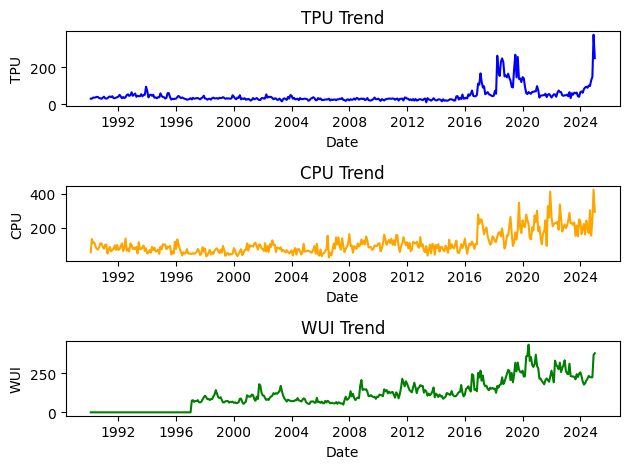

In [12]:
# Plotting TPU, CPU, and WUI over time
plt.subplot(3, 1, 1)
plt.plot(df_combined['Date'], df_combined['TPU'], label='TPU', color='blue')
plt.title('TPU Trend')
plt.xlabel('Date')
plt.ylabel('TPU')

plt.subplot(3, 1, 2)
plt.plot(df_combined['Date'], df_combined['CPU'], label='CPU', color='orange')
plt.title('CPU Trend')
plt.xlabel('Date')
plt.ylabel('CPU')

plt.subplot(3, 1, 3)
plt.plot(df_combined['Date'], df_combined['WUI'], label='WUI', color='green')
plt.title('WUI Trend')
plt.xlabel('Date')
plt.ylabel('WUI')

plt.tight_layout()
plt.show()

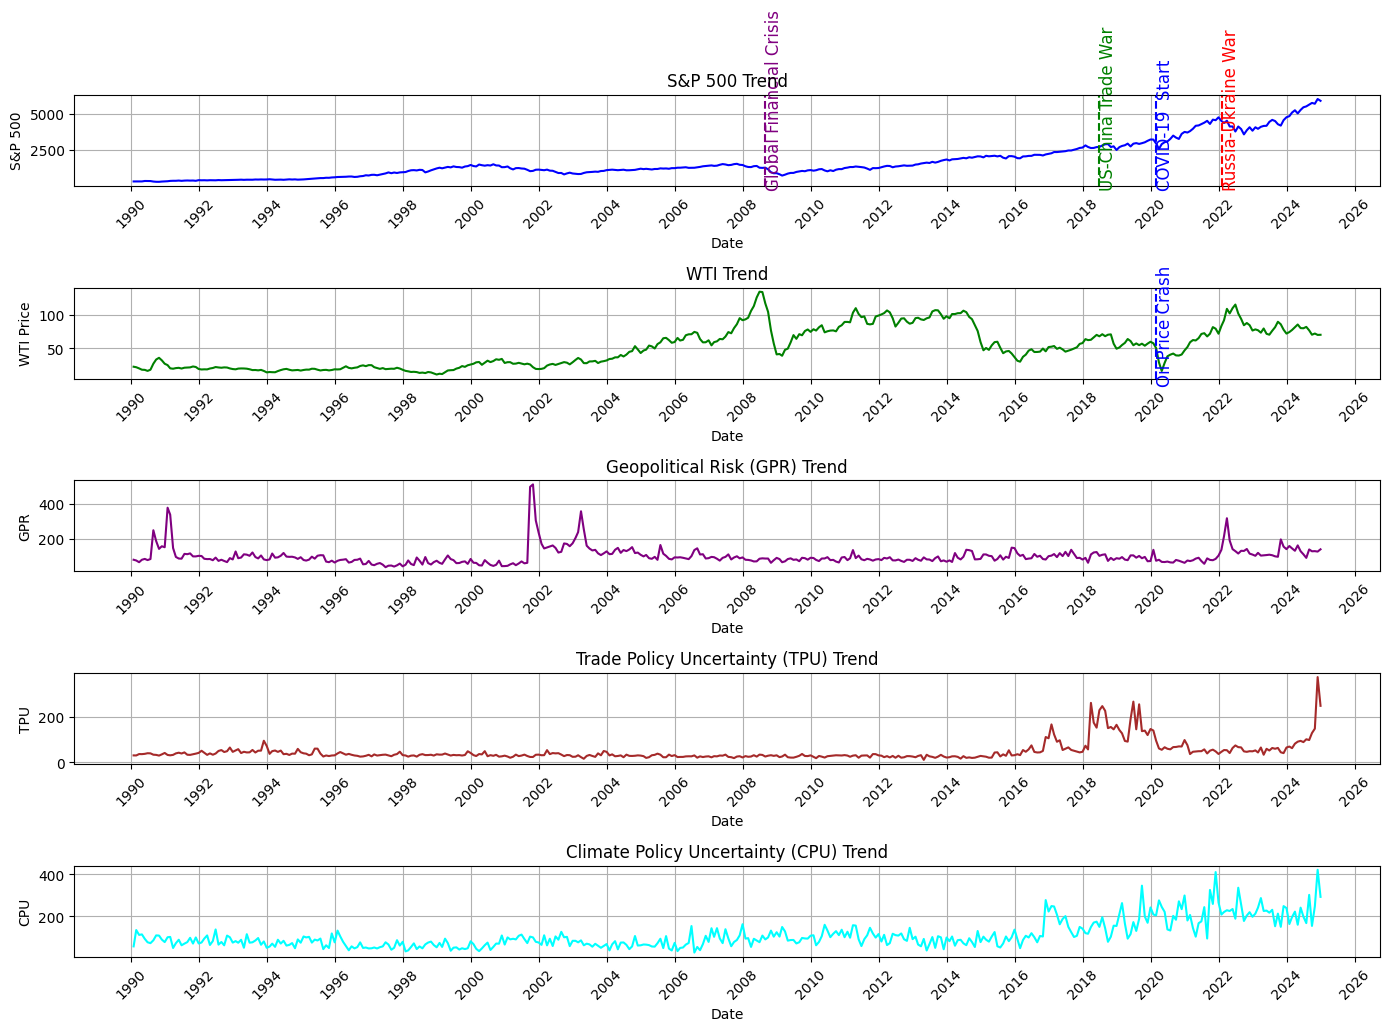

In [27]:
# Prepare the plot
plt.figure(figsize=(14, 10))

# Plot S&P 500
plt.subplot(5, 1, 1)
plt.plot(df_combined['Date'], df_combined['S&P 500(^GSPC)'], label='S&P 500', color='blue')
plt.title('S&P 500 Trend')
plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # X-axis labels every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Annotate events for S&P 500
plt.axvline(x=pd.to_datetime('2022-02-01'), color='red', linestyle='--', label='Russia-Ukraine War')
#plt.annotate('Russia-Ukraine War', xy=(pd.to_datetime('2022-02-01'), 4500), xytext=(pd.to_datetime('2022-02-01'), 4750),
#             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red',verticalalignment='center_baseline')
plt.text(pd.to_datetime('2022-02-01'), 0.1, "Russia-Ukraine War", rotation=90, fontsize=12,color='red')




plt.axvline(x=pd.to_datetime('2020-03-01'), color='blue', linestyle='--', label='COVID-19  Start')
#plt.annotate('COVID-19 Start', xy=(pd.to_datetime('2020-03-01'), 3000), xytext=(pd.to_datetime('2020-03-01'), 3200),
#             arrowprops=dict(arrowstyle='->', color='orange'), fontsize=10, color='orange')
plt.text(pd.to_datetime('2020-03-01'), 0.1, "COVID-19  Start", rotation=90, fontsize=12,color='blue')


plt.axvline(x=pd.to_datetime('2018-07-01'), color='green', linestyle='--', label='US-China Trade War')
#plt.annotate('US-China Trade War', xy=(pd.to_datetime('2018-07-01'), 2700), xytext=(pd.to_datetime('2018-07-01'), 3100),
#             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green')

plt.text(pd.to_datetime('2018-07-01'), 0.1, "US-China Trade War", rotation=90, fontsize=12,color='green')


plt.axvline(x=pd.to_datetime('2008-09-01'), color='purple', linestyle='--', label='Global Financial Crisis')
#plt.annotate('Global Financial Crisis', xy=(pd.to_datetime('2008-09-01'), 1200), xytext=(pd.to_datetime('2008-09-01'), 1300),
#             arrowprops=dict(arrowstyle='->', color='purple'), fontsize=10, color='purple')
plt.text(pd.to_datetime('2008-09-01'), 0.1, "Global Financial Crisis", rotation=90, fontsize=12,color='purple')


# Plot WTI
plt.subplot(5, 1, 2)
plt.plot(df_combined['Date'], df_combined['WTI'], label='WTI', color='green')
plt.title('WTI Trend')
plt.xlabel('Date')
plt.ylabel('WTI Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Annotate events for WTI
plt.axvline(x=pd.to_datetime('2020-03-01'), color='blue', linestyle='--', label='Oil Price Crash')
#plt.annotate('Oil Price Crash', xy=(pd.to_datetime('2020-03-01'), 30), xytext=(pd.to_datetime('2020-03-01'), 50),
#             arrowprops=dict(arrowstyle='->', color='orange'), fontsize=10, color='orange')

plt.text(pd.to_datetime('2020-03-01'), 0.5, "Oil Price Crash", rotation=90, fontsize=12,color='blue')

# Plot GPR (Geopolitical Risk)
plt.subplot(5, 1, 3)
plt.plot(df_combined['Date'], df_combined['GPR'], label='GPR', color='purple')
plt.title('Geopolitical Risk (GPR) Trend')
plt.xlabel('Date')
plt.ylabel('GPR')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Plot TPU (Trade Policy Uncertainty)
plt.subplot(5, 1, 4)
plt.plot(df_combined['Date'], df_combined['TPU'], label='TPU', color='brown')
plt.title('Trade Policy Uncertainty (TPU) Trend')
plt.xlabel('Date')
plt.ylabel('TPU')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Plot CPU (Climate Policy Uncertainty)
plt.subplot(5, 1, 5)
plt.plot(df_combined['Date'], df_combined['CPU'], label='CPU', color='cyan')
plt.title('Climate Policy Uncertainty (CPU) Trend')
plt.xlabel('Date')
plt.ylabel('CPU')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add a tight layout
plt.tight_layout()
plt.show()





#Interpretation of the Trend Analysis

For S&P 500 Trend Analysis, we annotated the following events.

- Global Financial Crisis (2008): This event caused a sharp drop in the S&P 500.

- US-China Trade War (2018): Due to this event, we see a slight dip or stagnation in the S&P 500 trend line.

- COVID-19 (2020): There is a noticeable impact around this period.We see a drop in the S&P500 line.

- Russia-Ukraine War (2022): This event caused some volatility, but market recovered.

From the above analysis, we see that the S&P 500 shows long-term growth, there are major dips during periods of financial crises and wars but it is resilient over time.

For WTI Oil Price Trend Analysis:

The Oil Price Crash event in 2020 was annotated. We see a sudden and sharp fall in oil price, possibly due to COVID-19 lockdowns and decreased demand.

This analysis reveals to us that oil prices are volatile, and they are heavily affected by global economic shocks and supply-demand dynamics.

For the GPR index which measures geopolitical tensions, we notice some spikes around 1990–1991 (This is the time when Gulf War happened), 2001–2003 (9/11, Iraq War), and 2022 (Russia-Ukraine War)

The analysis reveals that GPR spikes during wars or major global tensions, but later returns to a baseline level.

For the TPU Index , we notice some sharp rises, one is after 2017 which corresponds with the US-China Trade War.

Another is in 2024–2025 may be caused by escalating trade tensions or upcoming elections.

Analysis here revealed that there was a surge in TPU during periods of trade disputes and this rose again recently, it tells us that there is a growing global trade tension.

For the CPU index, there is a gradual increase from 2000, with steep rises after 2019.

Analysis reveals that Climate policy uncertainty has been rising on a steady basis, this shows that political and economic complexities of climate action grows globally.



Next, we do the Augmented Dickey-Fuller (ADF) test to check for stationarity. This is important to do because of the time series models we will be working on. We want to ensure that they give us accurate results.

In [48]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity on S&P 500
adf_test_sp500 = adfuller(df_combined['S&P 500(^GSPC)'].dropna())
print(f"S&P 500 ADF Test - Statistic: {adf_test_sp500[0]}, p-value: {adf_test_sp500[1]}")

# ADF test for WTI
adf_test_wti = adfuller(df_combined['WTI'].dropna())
print(f"WTI ADF Test - Statistic: {adf_test_wti[0]}, p-value: {adf_test_wti[1]}")

# ADF test for GPR
adf_test_gpr = adfuller(df_combined['GPR'].dropna())
print(f"GPR ADF Test - Statistic: {adf_test_gpr[0]}, p-value: {adf_test_gpr[1]}")

#ADF test for TPU
adf_test_tpu = adfuller(df_combined['TPU'].dropna())
print(f"TPU ADF Test - Statistic: {adf_test_tpu[0]}, p-value: {adf_test_tpu[1]}")

#ADF test for CPU
adf_test_cpu = adfuller(df_combined['CPU'].dropna())
print(f"CPU ADF Test - Statistic: {adf_test_cpu[0]}, p-value: {adf_test_cpu[1]}")

#ADF test for WUI
adf_test_wui = adfuller(df_combined['WUI'].dropna())
print(f"WUI ADF Test - Statistic: {adf_test_wui[0]}, p-value: {adf_test_wui[1]}")


S&P 500 ADF Test - Statistic: 2.6365805138975684, p-value: 0.999081028593283
WTI ADF Test - Statistic: -2.531078161098139, p-value: 0.10809460024772011
GPR ADF Test - Statistic: -6.802282214108706, p-value: 2.221395784978543e-09
TPU ADF Test - Statistic: -1.396649199112881, p-value: 0.5838814761398029
CPU ADF Test - Statistic: 0.04734661145019388, p-value: 0.9622768138001698
WUI ADF Test - Statistic: -0.5475112682815614, p-value: 0.8824068389353605


From these results, all time series data are non-stationary except the GPR index. We have to transform the non-stationary data to stationary ones in order to have accurate results for our analysis.

In [ ]:
sp500_monthly.isna().sum()

In [61]:
np.log(sp500_monthly['^GSPC'] / sp500_monthly.shift(1)['^GSPC']).dropna()

,^GSPC
1,0.008503
2,0.023966
3,-0.027255
4,0.088001
5,-0.008926
...,...
415,0.022578
416,0.019996
417,-0.009946
418,0.055720


In [62]:
# Log returns for S&P500 and WTI
# Log returns: ln(P_t / P_t-1)
sp500_returns = np.log(sp500_monthly['^GSPC'] / sp500_monthly.shift(1)['^GSPC']).dropna()

wti_returns = np.log(wti_monthly / wti_monthly.shift(1)).dropna()


# --- FIRST DIFFERENCE FOR TPU, CPU, WUI ---
tpu_diff = df_combined['TPU'].diff().dropna()
cpu_diff = df_combined['CPU'].diff().dropna()
wui_diff = df_combined['WUI'].diff().dropna()

Now, let us rerun our ADF tests

In [63]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    stat, pval = result[0], result[1]
    print(f"{name} ADF Test - Statistic: {stat:.4f}, p-value: {pval:.4f}")
    if pval <= 0.05:
        print("✅ Stationary (reject H₀)\n")
    else:
        print("❌ Non-stationary (fail to reject H₀)\n")

# Apply tests to our transformed series
adf_test(sp500_returns, "S&P 500 Returns")
adf_test(wti_returns, "WTI Returns")
adf_test(tpu_diff, "TPU (First Difference)")
adf_test(cpu_diff, "CPU (First Difference)")
adf_test(wui_diff, "WUI (First Difference)")


S&P 500 Returns ADF Test - Statistic: -20.4354, p-value: 0.0000
✅ Stationary (reject H₀)

WTI Returns ADF Test - Statistic: -13.7548, p-value: 0.0000
✅ Stationary (reject H₀)

TPU (First Difference) ADF Test - Statistic: -2.4513, p-value: 0.1278
❌ Non-stationary (fail to reject H₀)

CPU (First Difference) ADF Test - Statistic: -8.4332, p-value: 0.0000
✅ Stationary (reject H₀)

WUI (First Difference) ADF Test - Statistic: -7.0999, p-value: 0.0000
✅ Stationary (reject H₀)



After appropriate transformations, we have achieved stationarity for all series except TPU, it remains non stationary even after first differencing. We will apply second differencing to it and test again.

In [64]:
tpu_2diff = df_combined['TPU'].diff().dropna().diff().dropna()
adf_test(tpu_2diff, "TPU (Second Difference)")


TPU (Second Difference) ADF Test - Statistic: -9.8558, p-value: 0.0000
✅ Stationary (reject H₀)

